# Exploratory data analysis (EDA) on iris flower dataset

Basic terminology 

- What is EDA ?
- Data-point/vector/observation
    vector:n-dimensional array 
- data-set   # table 
- feature/variables/input-variable/independent-variable
    sepal length,sepal width,petal length,petal width   
- Label/dependent-variable/output-variables/class/class-label/response- label
    species 
- vector:2-D,3-D,.....n-D
- what is a 1-D vector  :  Scalar

# About Iris flower dataset 
https://en.wikipedia.org/wiki/Iris_flower_data_set

* A simple data set to learn basics 
* 3 flowers of iris species.[see image on wikipedia link above]
* this data set is given by Ronald fisher in 1936
* petal and sepal:
    https://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
* objective : classify a new flower as belonging to one of the 3classes given the 4 features 
* importance of the doamin knowledge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

# Download iris dataset 
[https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv]


In [2]:
# to load iris dataset 
iris = pd.read_csv('iris.csv')

In [4]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# how many data points are here 
iris.shape

(150, 5)

In [4]:
# what are the column name in the data set 
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
# how many data points for each class 

iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

Balanced vs imbalanced data set :  
    iris is a balanced data set because here number of data points in each class is equal 

Let say if we have 4000 and 6000 then is not a imbalanced data set it is a almost balanced data set
If we have imbalanced data set then we have to do slightly different analysis of data 


# 2-D scatter plot 

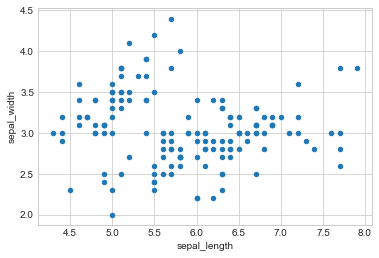

In [17]:
# 2-D scatter plot:
    # ALWAYS understand axis :label and scale 
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')

plt.show()


# by this we can not make much sence here 
# what if we color by there class-label/flower-type

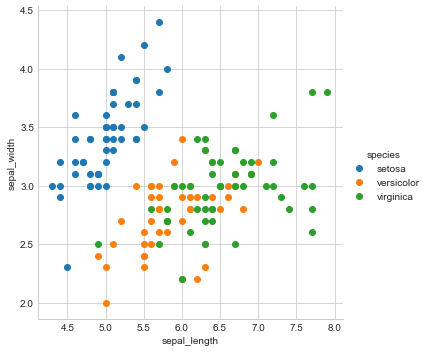

In [16]:
#2-D scatter plot with color coding for each flower type/class
sb.set_style('whitegrid');
sb.FacetGrid(iris,hue='species',size=5).map(plt.scatter,'sepal_length','sepal_width').add_legend();
plt.show();

#Notice that the blue points are easily seperated by a line from green and orange points 
#but green and ornage are not seprated easly 
#can we draw multiple 2-D scatters plot for each combination sof features 
#how many combinations are there exist 4c2 = 6 

###  observation(s)

- using sepal length and sepal width we can distinguish setosa class from others: 
- seperating versicolor from verginica is much harder then they considered overlaps.

# 3-D scatter plot 

https://plot.ly/pandas/3d-scatter-plots/

### pair-plot

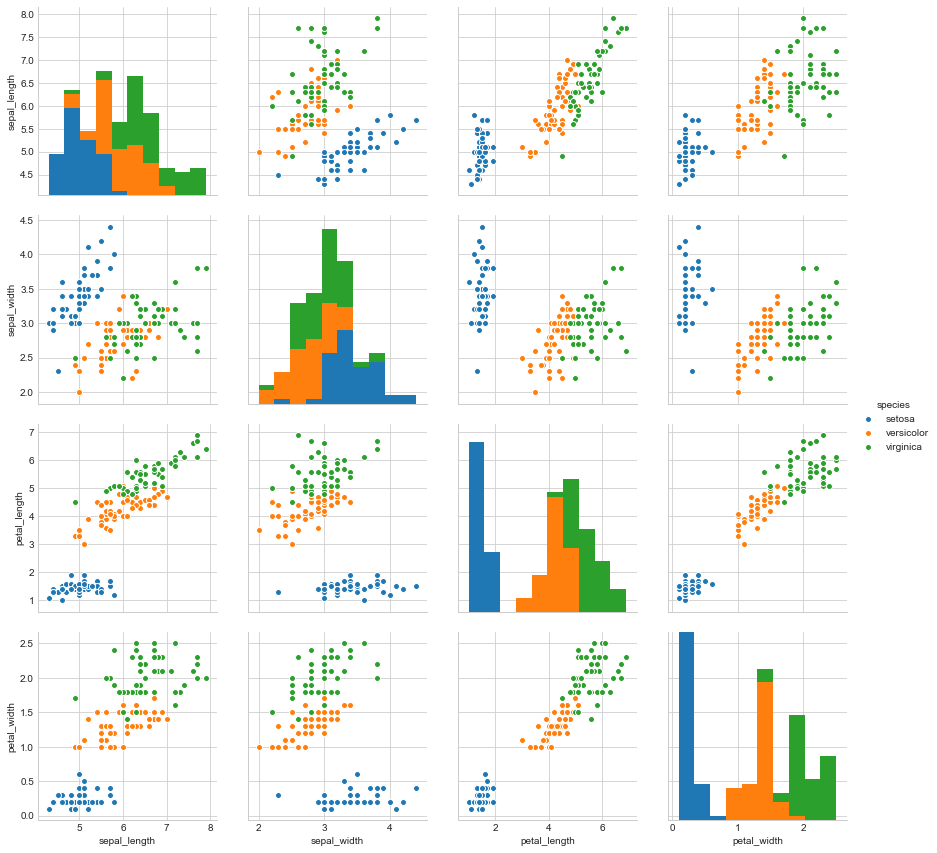

In [11]:
# pair wise scatter plot is called pair plot 
# disadvantages :  cannot visualize higher dimensional patterns in 3-D and 2-D 
# only possible in 2-D sapce 

sb.set_style('whitegrid')
sb.pairplot(iris,hue='species',size=3)
plt.show()

# notice diagonal are pdfs 

## observations 

- patel length and patel width are vary usefull features to identify various flower types
- while can be easily identify (linearly seprable) versicolor and virginica have some overlaps 
- but they are almost linearly seprable 
- we can find "lines" and "if-else" conditions to buid a simple model to classify the flowers types 

## Limitations of pair-plot

- it can not work for 10000 dimensional data 
- it is useful only for 6-D data 

# Histogram,PDFs,CDFs

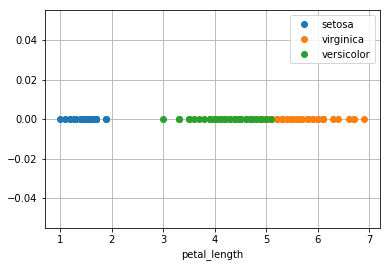

In [14]:
# here we see 1-D scatter plot  
import numpy as np
iris_setosa = iris.loc[iris['species']=='setosa']
iris_versicolor = iris.loc[iris['species']=='versicolor']
iris_virginica = iris.loc[iris['species']=='virginica']
# print(iris_setosa['petal_length'])
plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length'],),'o',label='setosa')
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length'],),'o',label='virginica')
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length'],),'o',label='versicolor')
plt.xlabel("petal_length")
plt.grid()
plt.legend()
plt.show()

- Disadvantages of 1-D scatter plot is we can not make idea about results 
- here overlapping a lot

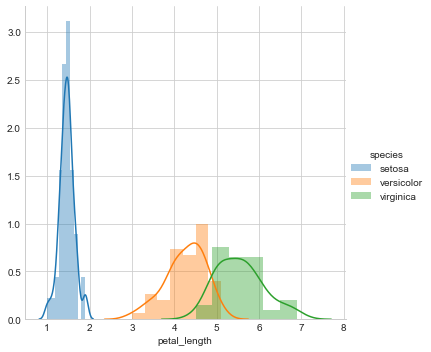

In [19]:
# to plot histogram 
sb.FacetGrid(iris,hue="species",size=5).map(sb.distplot,'petal_length').add_legend()

plt.show()

- here y axis is counts of that flower at this x value 
- height is tells us how often we found this x values 
- here this blue line like a graph is called probability density function(PDFs)
- in short pdf is a smooth histogram (Due to kernal density estimation[KDE])
- at point 5 we have higher probability to get virginica then versicolor
- this plot is also called density plot because we can find out that which reason is having more density 

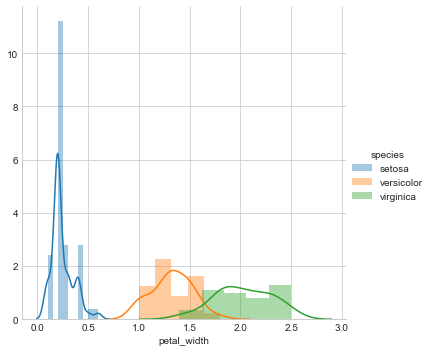

In [20]:
sb.FacetGrid(iris,hue="species",size=5).map(sb.distplot,'petal_width').add_legend()

plt.show()

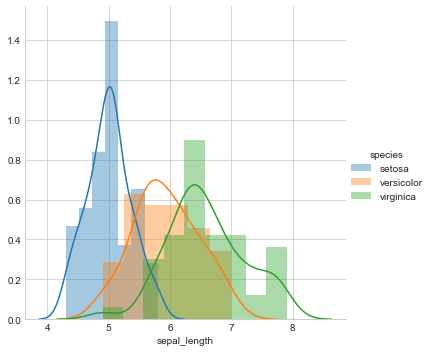

In [21]:
sb.FacetGrid(iris,hue="species",size=5).map(sb.distplot,'sepal_length').add_legend()

plt.show()

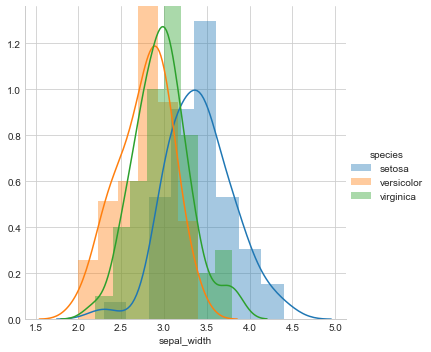

In [22]:
sb.FacetGrid(iris,hue="species",size=5).map(sb.distplot,'sepal_width').add_legend()
plt.show()

## Observation

- here we observ that prtal length is gives us better results 
- petal length is slightly better than petal width
- sepal length and sepal width are not good features for the classification of the iris family flowers
- pl > pw >>> sl >>>sw

### Univariate analysis

- univariate analysis is that analysis when we are doing analysis of any problem by only one feature 
- this last histogramic analysis is a uivariate analysis 

#### cumulative distribution function (CDF)

here we can see what % of versicolor flowers have a petal_length of less than 1.6

- cdf is a cumulative sum of pdf upto that pl point 
- and it is also a area under the curve of pdf upto at x(pl)
- when you diffrentiate of your cdf then you will get a pdf 
- when you integrate your pdf then you will get cdf

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


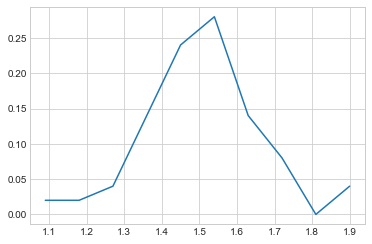

In [23]:
# to plot a pdf 
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


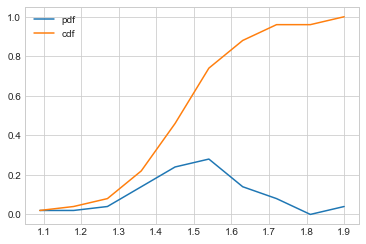

In [25]:
# to plot a cdf 
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')

plt.legend()
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


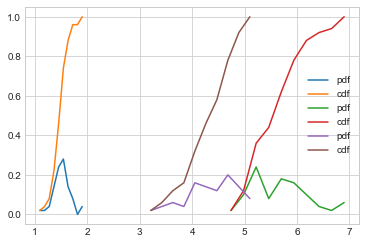

In [27]:
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')


counts,bin_edges=np.histogram(iris_virginica['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')


counts,bin_edges=np.histogram(iris_versicolor['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
plt.show()

## Mean,variance,standard-daviation

In [29]:
# this is an another method to appends an element into the numpy array 
a=np.array([1,2,5,6,8,9,3])
np.append(a,50)

array([ 1,  2,  5,  6,  8,  9,  3, 50])

In [31]:
# Means of the petal length
print("Means")
print("setosa",np.mean(iris_setosa["petal_length"]))
print("versicolor",np.mean(iris_versicolor["petal_length"]))
print("virginica",np.mean(iris_virginica["petal_length"]))


Means
setosa 1.464
versicolor 4.26
virginica 5.552


here you can se that if add a wrong element to the values then mean will be a useless thing for us

In [35]:
print("setosa mean : ",np.mean(np.append(iris_setosa["petal_length"],50)))

setosa mean :  2.4156862745098038


#### here if we talk about variance then this a spread how far our elements are spread (width of histogram's graph)

Formula of variance is :  
- Var = 1/n(submission of i=0 to t=50 (x[i] – mean )^2)  [this is the average of submission of distance's square ]
- Formula of standard daviation : 
- Standard-daviation = squareroot of (variance )
- If std-dav is small that you know that spread is small 
- Here spread means std-dav(spread= std-dav)


In [37]:
# standard-daviation
print("standard-daviation")
print("setosa      :",np.std(iris_setosa["petal_length"]))
print("versicolor  :",np.std(iris_versicolor["petal_length"]))
print("virginica   :",np.std(iris_virginica["petal_length"]))


standard-daviation
setosa      : 0.17176728442867115
versicolor  : 0.4651881339845204
virginica   : 0.5463478745268441


by only looking mean and std-dav we can make a idea of data

In [38]:
# standard-daviation
print("standard-daviation")
print("setosa      :",np.median(iris_setosa["petal_length"]))
print("versicolor  :",np.median (iris_versicolor["petal_length"]))
print("virginica   :",np.median (iris_virginica["petal_length"]))

standard-daviation
setosa      : 1.5
versicolor  : 4.35
virginica   : 5.55


In [40]:
 # here you observe that there is not a masurable chnage in median after 50 insertion that means meadian is more usefull
print("setosa median : ",np.median (np.append(iris_setosa["petal_length"],50)))

setosa median :  1.5


This is the method to find out the median of the series of numbers called x here 
- Step 1.   first sort then in any order 
- Step 2.   If number of elements are odd then list[(n+1)/2 ] is your median 
- Step 3.   If number is even then find two middile numbers and find mean of them and this mean is your median 


NOTE : median is remain good and clean until we have not more than 50% of values are corrutped 
After that your meadian should get corrupted 


### percentile

xth percentile is tells us what % of elements are smaller than this value and what % of elements are greater than this value  

50th percentile is  a median 

NOTE:25th,50th,75th,100th percentiles are called quantiles 

25th is a first , 50th is second , 75th is third , 100th is fourth quantile 

In [43]:
print("90th percentile")
print("setosa      :",np.percentile(iris_setosa["petal_length"],90))
print("versicolor  :",np.percentile (iris_versicolor["petal_length"],90))
print("virginica   :",np.percentile (iris_virginica["petal_length"],90))


90th percentile
setosa      : 1.7
versicolor  : 4.8
virginica   : 6.3100000000000005


it tells us 90 % of data having petal length is less than 1.7 setosa,4.8 versicolor,6.3 virginica 

### Median absolute daviation

In [44]:
from statsmodels import robust
print("Median absolute daviation")
print("setosa      :",robust.mad(iris_setosa["petal_length"]))
print("versicolor  :",robust.mad (iris_versicolor["petal_length"]))
print("virginica   :",robust.mad (iris_virginica["petal_length"]))


Median absolute daviation
setosa      : 0.14826022185056031
versicolor  : 0.5189107764769602
virginica   : 0.6671709983275211


### box plot and whiskers

- by just loking a histogram we can not tell that what is the 25th percentile value
- to do this we have a plot called box and whiskers plot 

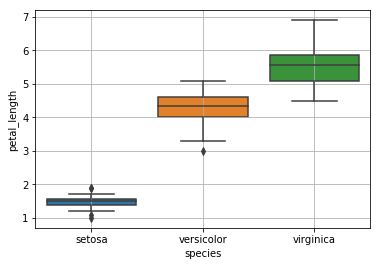

In [4]:
# to draw box plot 
sb.boxplot(x='species',y='petal_length',data=iris)
plt.grid()
plt.show()

### violin plots 

- these plots are gives us combine results of two plot (histogram/pdf and box plots)

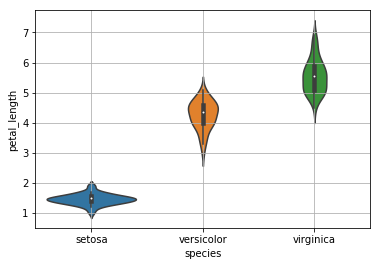

In [10]:
sb.violinplot(x='species',y='petal_length',data=iris,size=8)
plt.grid()
plt.show()

Here mid three lines are same in the box plot
And last two line are whiskers 
These side curves are nothing but they are histograms/pdfs 

### Multivariate probability density, contour plot.

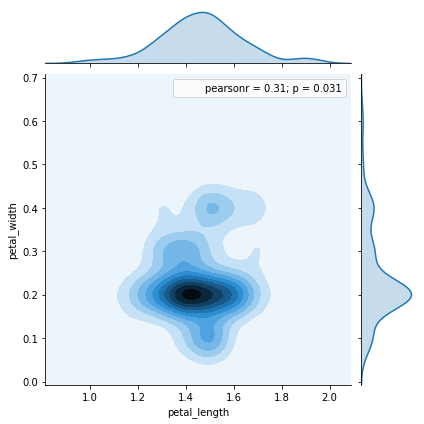

In [15]:
#2D Density plot, contors-plot
sb.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();